In [46]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Load the dataset
data = pd.read_csv('obesity_dataset.csv')
data.head()

,Gender,Height,Age,Meals_Per_Day,Frequency_Physical_Activity,Water_Intake,Vegetable_Intake,Technology_Use,Weight,Food_Between_Meals,Mode_Transportation,Alcohol_Intake,SMOKE,family_history_with_overweight,High_Caloric_Food,Monitor_Calories,Obesity_Level,Obese/Overweight
0,Female,1.62,21.0,3.0,0.0,2.0,2.0,1.0,64.0,Sometimes,Public_Transportation,no,no,yes,no,no,Normal_Weight,No
1,Female,1.52,21.0,3.0,3.0,3.0,3.0,0.0,56.0,Sometimes,Public_Transportation,Sometimes,yes,yes,no,yes,Normal_Weight,No
2,Male,1.80,23.0,3.0,2.0,2.0,2.0,1.0,77.0,Sometimes,Public_Transportation,Frequently,no,yes,no,no,Normal_Weight,No
3,Male,1.80,27.0,3.0,2.0,2.0,3.0,0.0,87.0,Sometimes,Walking,Frequently,no,no,no,no,Overweight_Level_I,Yes
4,Male,1.78,22.0,1.0,0.0,2.0,2.0,0.0,89.8,Sometimes,Public_Transportation,Sometimes,no,no,no,no,Overweight_Level_II,Yes


In [48]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [49]:
# Define features (X) and target (y), excluding 'Obesity_Level'
X = data.drop(columns=['Weight', 'Obese/Overweight', 'Obesity_Level'])
y = data['Obese/Overweight']

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by = 'Importance', ascending = True)

In [53]:
# Display feature importance
print(feature_importances)

                           Feature  Importance
11                           SMOKE    0.004263
14                Monitor_Calories    0.015429
0                           Gender    0.021583
13               High_Caloric_Food    0.021884
10                  Alcohol_Intake    0.027858
9              Mode_Transportation    0.040167
6                 Vegetable_Intake    0.046277
5                     Water_Intake    0.059725
7                   Technology_Use    0.067993
3                    Meals_Per_Day    0.068734
4      Frequency_Physical_Activity    0.086842
1                           Height    0.088057
12  family_history_with_overweight    0.132652
2                              Age    0.155953
8               Food_Between_Meals    0.162583


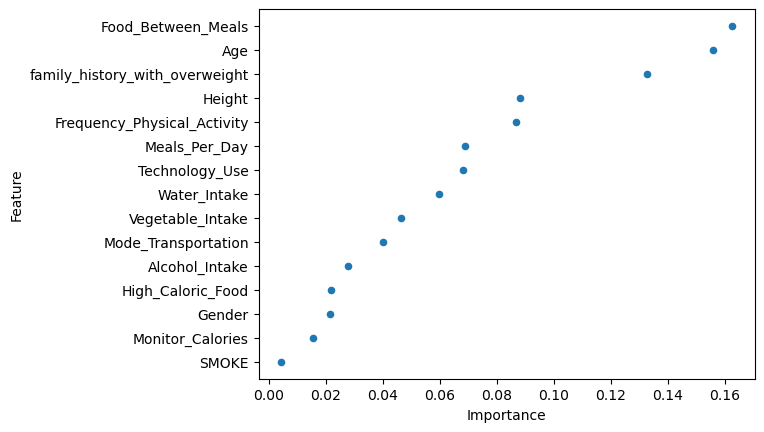

In [63]:
feature_importances.plot.scatter(x = 'Importance', y = 'Feature')
plt.savefig('random_forest_feature_importance.png', bbox_inches = 'tight', dpi = 300)
plt.show()